In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def log_RegretMean_plot(res,fstar,label,color,linestyle,error_bound=True):
    
    
    total_record = (np.array(res)-fstar)
    
    
    N = total_record.shape[0]
    
    std = np.std(total_record,axis=0)
    
    mean = np.mean(total_record,axis=0)
    
    median = np.median(total_record,axis=0)
    
    iter = np.array(range(mean.shape[0]))
    
    lower = mean - 1*std/np.sqrt(N)
    upper = mean + 1*std/np.sqrt(N)
    
    lower.astype(float)
    upper.astype(float)
    
    
    plt.plot(mean,linewidth=2,label=label,color=color,linestyle=linestyle)
    if error_bound:
        plt.fill_between(iter, lower, upper,alpha=0.25,color=color)   
    

In [12]:
def log_Regret_plot(res,fstar,label,color,linestyle,error_bound=True):
    
    
    total_record = np.log10(np.array(res)-fstar)
    
    
    N = total_record.shape[0]
    
    std = np.std(total_record,axis=0)
    
    mean = np.mean(total_record,axis=0)
    
    median = np.median(total_record,axis=0)
    
    iter = np.array(range(mean.shape[0]))
    
    lower = mean - 1*std/np.sqrt(N)
    upper = mean + 1*std/np.sqrt(N)
    
    lower.astype(float)
    upper.astype(float)
    
    
    plt.plot(mean,linewidth=2,label=label,color=color,linestyle=linestyle)
    if error_bound:
        plt.fill_between(iter, lower, upper,alpha=0.25,color=color)   

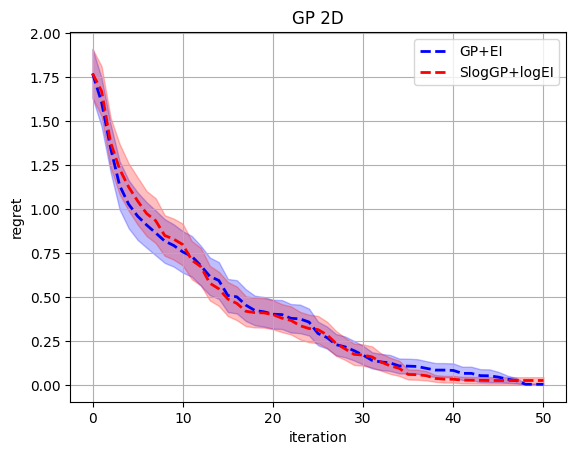

In [4]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/GP2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/GP2D_SlogGP+logEI'), delimiter=',')

fstar = 0.


log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('GP 2D')

plt.savefig('plots/GP5.png')

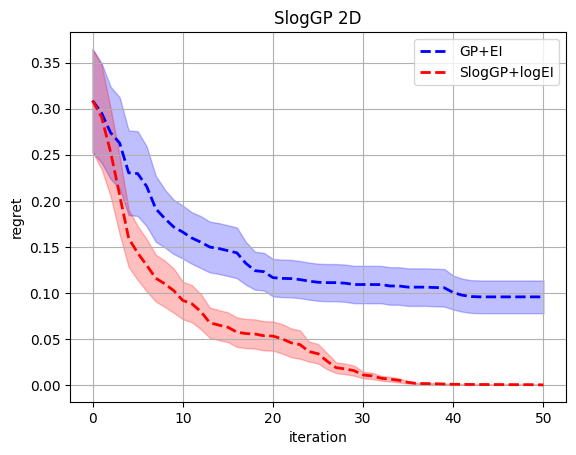

In [5]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SlogGP2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SlogGP2D_SlogGP+logEI'), delimiter=',')

fstar = 0.


log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('SlogGP 2D')

plt.savefig('plots/SlogGP5.png')

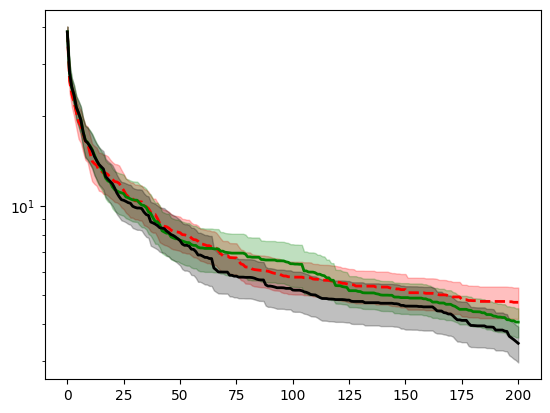

In [5]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

#log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.yscale("log") 


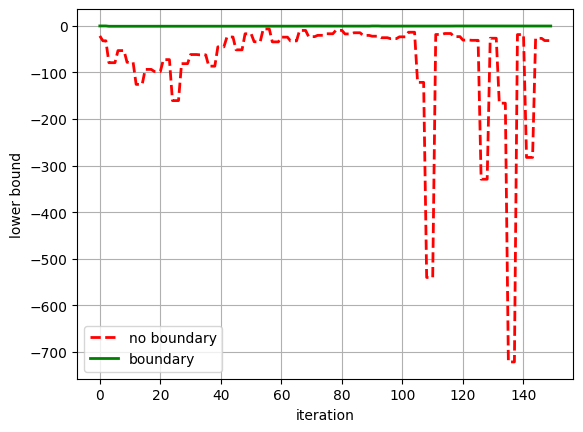

In [13]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')



median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()
#plt.ylim([-1000,20])

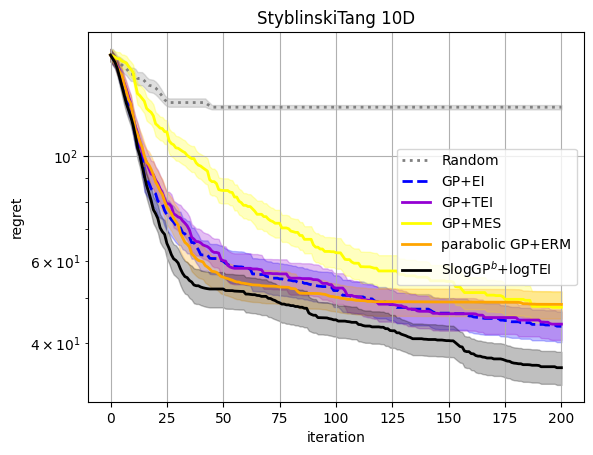

In [25]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =-10*39.166166 

log_RegretMean_plot(Random,fstar=fstar,label='Random',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(-BO_KG,fstar=fstar,label='GP+KG',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='GP+MES',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')


plt.yscale("log") 
plt.grid()
plt.legend()
plt.title('StyblinskiTang 10D')

plt.savefig('plots/StyblinskiTang5.png')

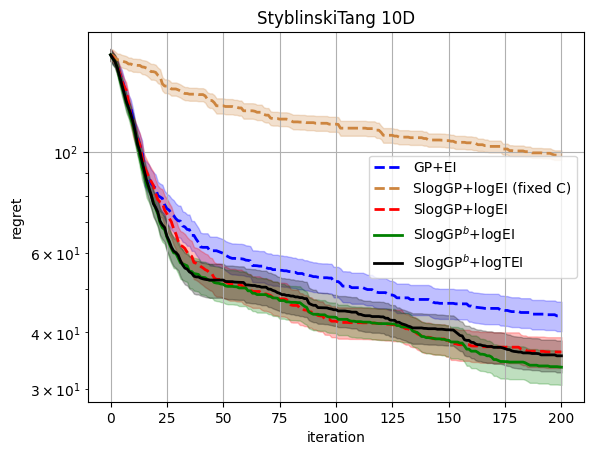

In [15]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = -10*39.166166 


log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('StyblinskiTang 10D')

plt.savefig('plots/StyblinskiTang6.png')

Text(0.5, 1.0, 'StyblinskiTang 2D')

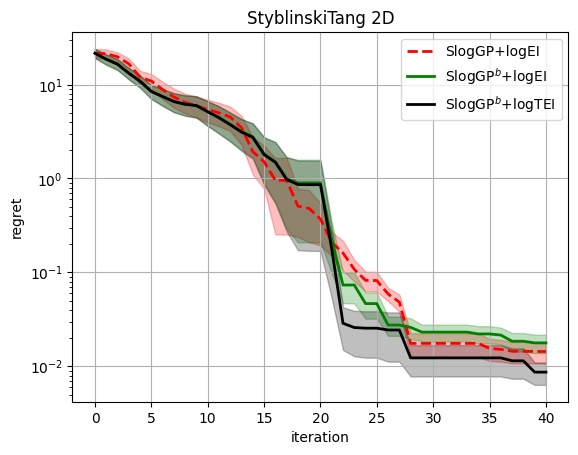

In [4]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = -2*39.166166 


log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('StyblinskiTang 2D')

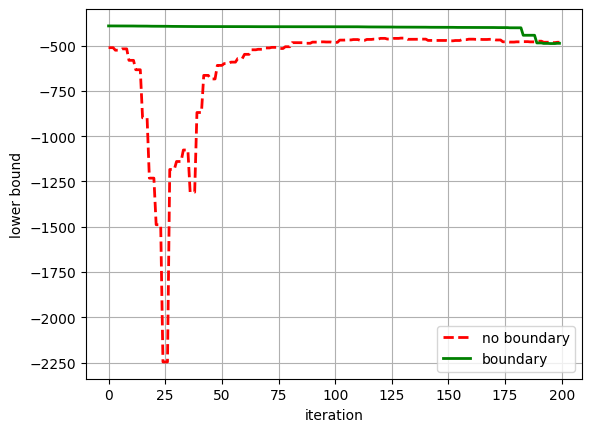

In [16]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')


median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

plt.savefig('plots/StyblinskiTang7.png')

Text(0.5, 1.0, 'Lunar Lander 12D')

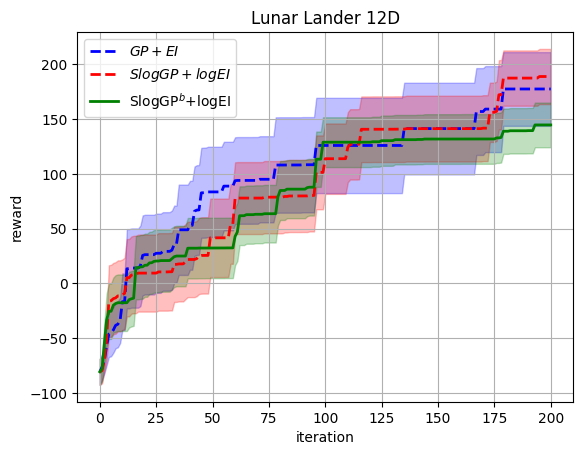

In [10]:
#Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Lunar12D_GP+EI'), delimiter=',')
# BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+TEI'), delimiter=',')
# BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/Branin2D_GP+KG'), delimiter=',')
# BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+MES'), delimiter=',')
# BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Lunar12D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Lunar12D_SLogGP(boundary)+logEI'), delimiter=',')
#SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Lunar12D_SLogGP+logEI_otherCase'), delimiter=',')


fstar = 0.

# log_RegretMean_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(-BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(-BO_KG,fstar=fstar,label='$GP+KG$',color='olive',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
# log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
# log_RegretMean_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
#log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)
log_RegretMean_plot(-SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('reward')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('Lunar Lander 12D')

Text(0.5, 1.0, 'Sphere 2D')

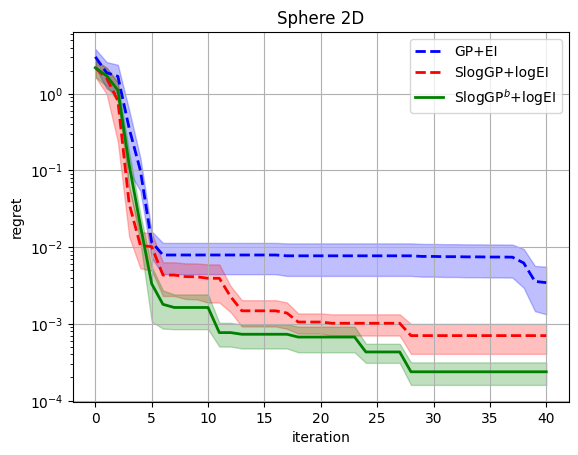

In [3]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Sphere2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Sphere2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Sphere2D_SLogGP(boundary)+logEI'), delimiter=',')



fstar = 0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.yscale("log") 
plt.legend()
plt.title('Sphere 2D')

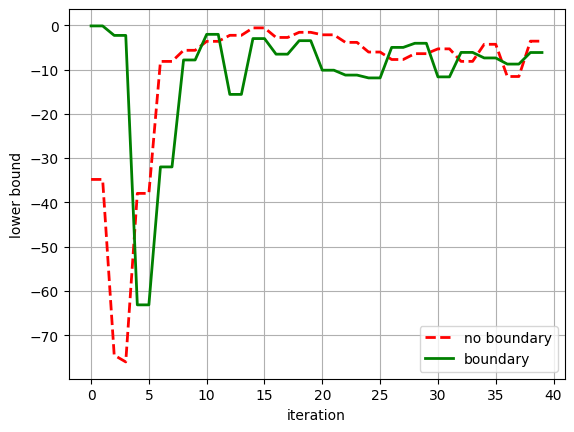

In [8]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Sphere2D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Sphere2D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')


median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()


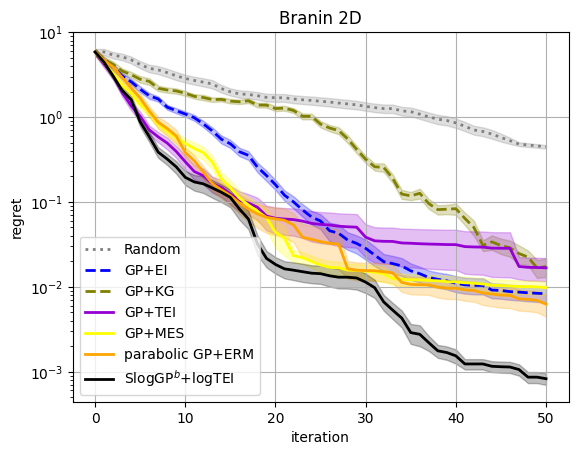

In [3]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+TEI'), delimiter=',')
BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/Branin2D_GP+KG'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logTEI'), delimiter=',')



fstar = 0.397887

log_RegretMean_plot(Random,fstar=fstar,label='Random',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-BO_KG,fstar=fstar,label='GP+KG',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='GP+MES',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.yscale("log") 
plt.legend()
plt.title('Branin 2D')

plt.savefig('plots/Branin5.png')

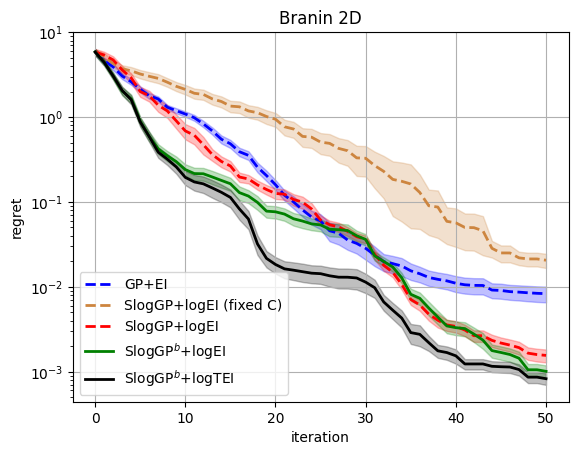

In [7]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.397887

log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.yscale("log") 
plt.legend()
plt.title('Branin 2D')

plt.savefig('plots/Branin6.png')

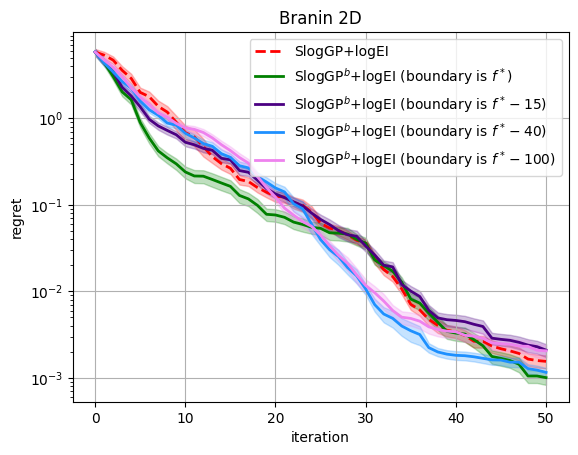

In [18]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logEI15 = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_15_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logEI40 = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_40_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logEI100 = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_100_SLogGP(boundary)+logEI'), delimiter=',')



fstar = 0.397887

log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI (boundary is $f^*$)',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI15,fstar=fstar,label='SlogGP$^b$+logEI (boundary is $f^*-15$)',color='indigo',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI40,fstar=fstar,label='SlogGP$^b$+logEI (boundary is $f^*-40$)',color='dodgerblue',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI100,fstar=fstar,label='SlogGP$^b$+logEI (boundary is $f^*-100$)',color='violet',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.yscale("log") 
plt.legend()
plt.title('Branin 2D')

plt.savefig('plots/Branin_differentBoundary.png')

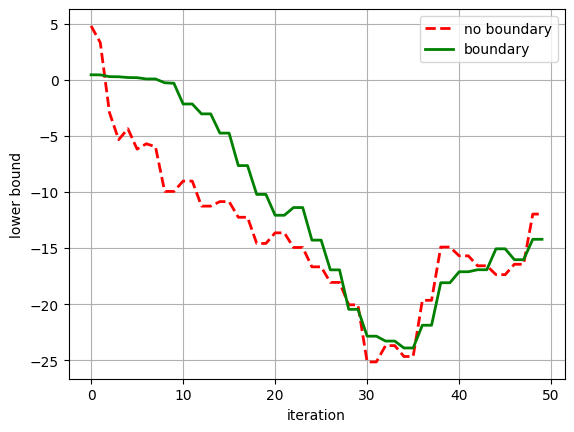

In [45]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')


median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

plt.savefig('plots/Branin7.png')

(array([0.00092729, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00092729, 0.        , 0.        , 0.        ,
        0.00092729, 0.        , 0.00092729, 0.00092729, 0.00092729,
        0.00092729, 0.00370915, 0.00649102, 0.01390933, 0.06212832]),
 array([-215.12498261, -204.34085131, -193.55672001, -182.77258871,
        -171.98845741, -161.20432611, -150.42019481, -139.63606351,
        -128.8519322 , -118.0678009 , -107.2836696 ,  -96.4995383 ,
         -85.715407  ,  -74.9312757 ,  -64.1471444 ,  -53.3630131 ,
         -42.57888179,  -31.79475049,  -21.01061919,  -10.22648789,
           0.55764341]),
 <BarContainer object of 20 artists>)

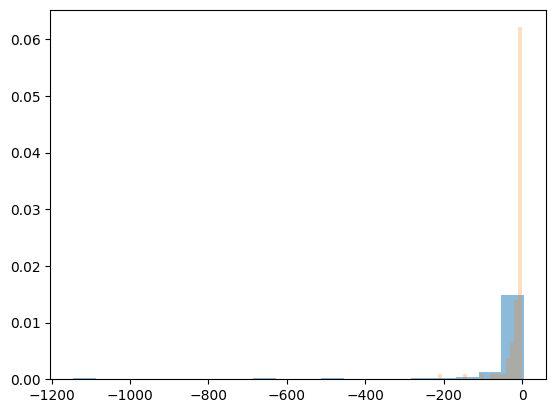

In [20]:
plt.hist(SLogGP_logEI[:,10],bins=20,alpha=0.5,density=True)
plt.hist(SLogGP_boundary_logEI[:,10],bins=20,alpha=0.25,density=True)

(array([0.00282133, 0.        , 0.        , 0.        , 0.        ,
        0.00282133, 0.00846398, 0.00846398, 0.00282133, 0.01410663,
        0.01128531, 0.00564265, 0.01974929, 0.02257061, 0.03667725,
        0.0423199 , 0.02821327, 0.02257061, 0.00282133, 0.05078388]),
 array([-70.49118087, -66.94674932, -63.40231776, -59.85788621,
        -56.31345466, -52.7690231 , -49.22459155, -45.68015999,
        -42.13572844, -38.59129688, -35.04686533, -31.50243378,
        -27.95800222, -24.41357067, -20.86913911, -17.32470756,
        -13.78027601, -10.23584445,  -6.6914129 ,  -3.14698134,
          0.39745021]),
 <BarContainer object of 20 artists>)

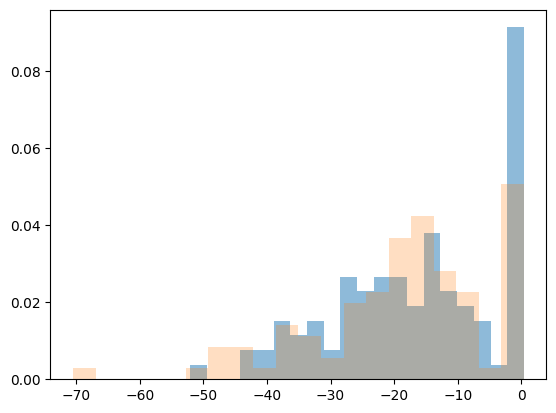

In [21]:
plt.hist(SLogGP_logEI[:,40],bins=20,alpha=0.5,density=True)
plt.hist(SLogGP_boundary_logEI[:,40],bins=20,alpha=0.25,density=True)

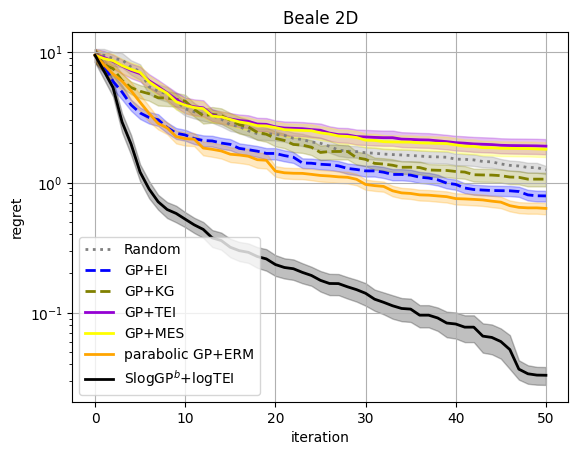

In [6]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_GP+TEI'), delimiter=',')
BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/Beale2D_GP+KG'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(Random,fstar=fstar,label='Random',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-BO_KG,fstar=fstar,label='GP+KG',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='GP+MES',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Beale 2D')

plt.savefig('plots/Beale5.png')

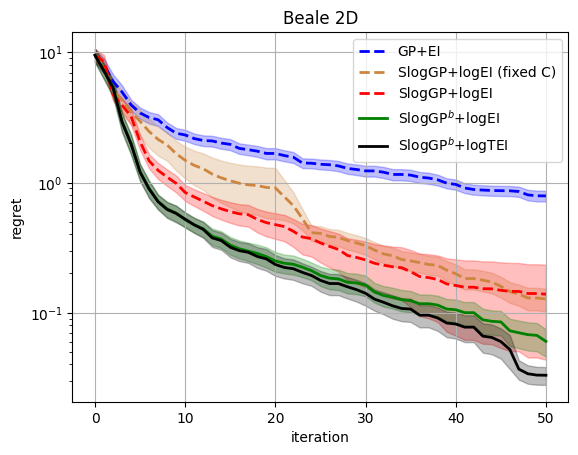

In [7]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Beale 2D')

plt.savefig('plots/Beale6.png')

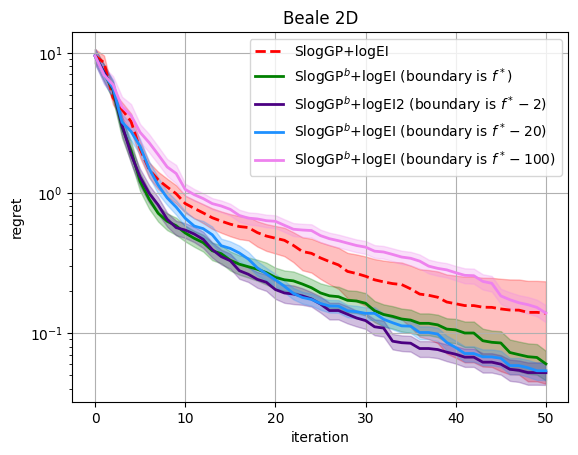

In [17]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logEI15 = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_2_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logEI40 = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_20_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logEI100 = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_100_SLogGP(boundary)+logEI'), delimiter=',')



fstar = 0.

log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI (boundary is $f^*$)',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI15,fstar=fstar,label='SlogGP$^b$+logEI2 (boundary is $f^*-2$)',color='indigo',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI40,fstar=fstar,label='SlogGP$^b$+logEI (boundary is $f^*-20$)',color='dodgerblue',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI100,fstar=fstar,label='SlogGP$^b$+logEI (boundary is $f^*-100$)',color='violet',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.yscale("log") 
plt.legend()
plt.title('Beale 2D')

plt.savefig('plots/Beale_differentBoundary.png')

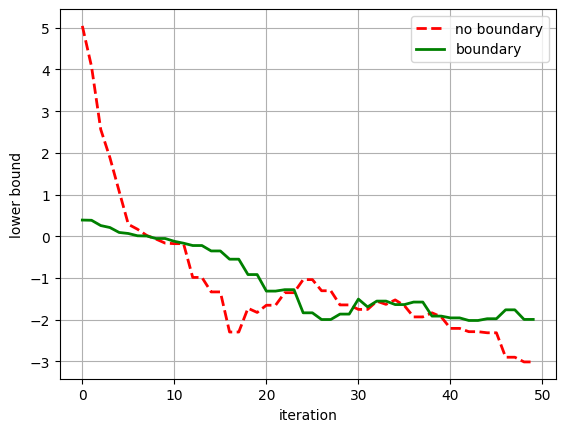

In [6]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()
plt.savefig('plots/Beale7.png')

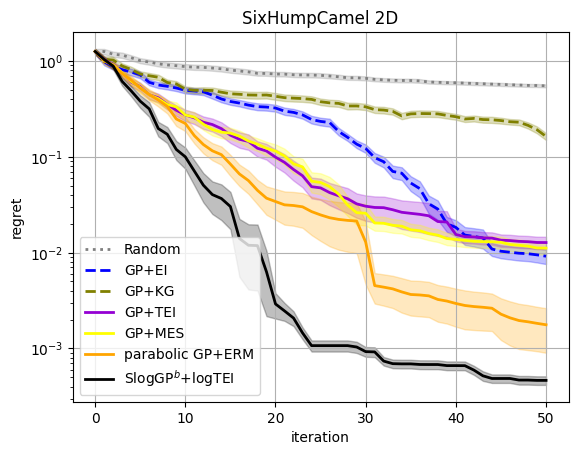

In [3]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_GP+TEI'), delimiter=',')
BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/SixHumpCamel2D_GP+KG'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = -1.0317


log_RegretMean_plot(Random,fstar=fstar,label='Random',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-BO_KG,fstar=fstar,label='GP+KG',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='GP+MES',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()
plt.yscale("log") 

plt.legend()
plt.title('SixHumpCamel 2D')

plt.savefig('plots/SixHumpCamel5.png')

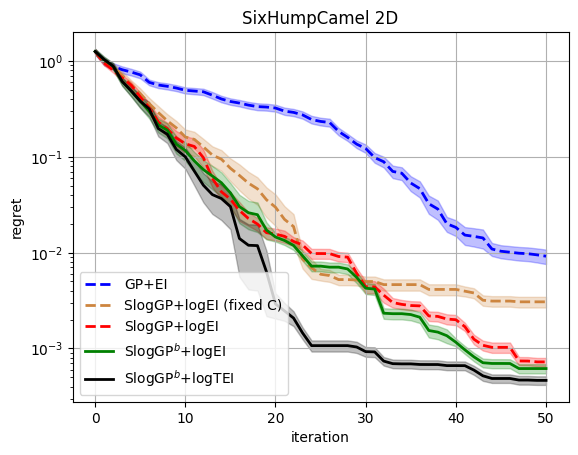

In [9]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = -1.0317


log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()
plt.yscale("log") 

plt.legend()
plt.title('SixHumpCamel 2D')

plt.savefig('plots/SixHumpCamel6.png')

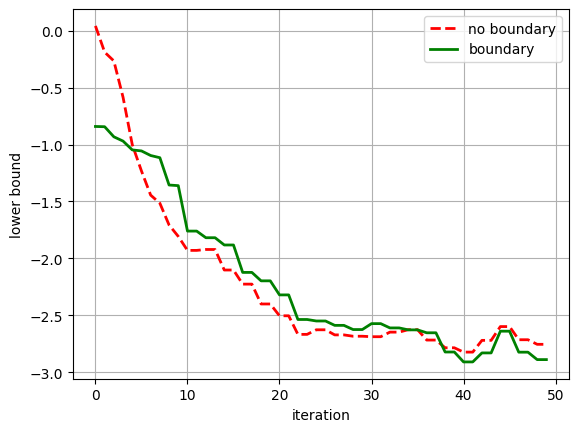

In [49]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')



median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

plt.grid()
plt.legend()

plt.grid()
plt.savefig('plots/SixHumpCamel7.png')

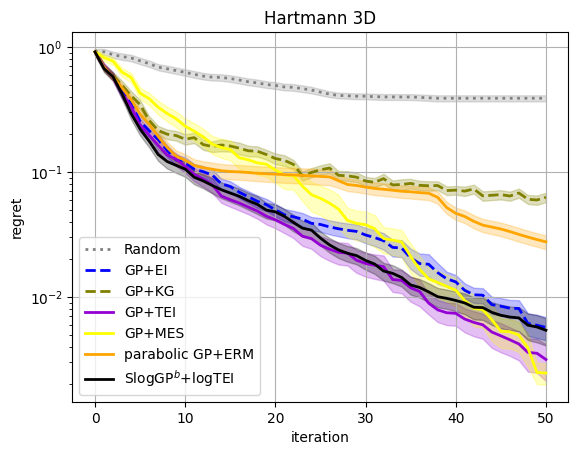

In [3]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_GP+TEI'), delimiter=',')
BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/Hartmann3D_GP+KG'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = -3.86278

log_RegretMean_plot(Random,fstar=fstar,label='Random',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-BO_KG,fstar=fstar,label='GP+KG',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='GP+MES',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Hartmann 3D')

plt.savefig('plots/Hartmann5.png')


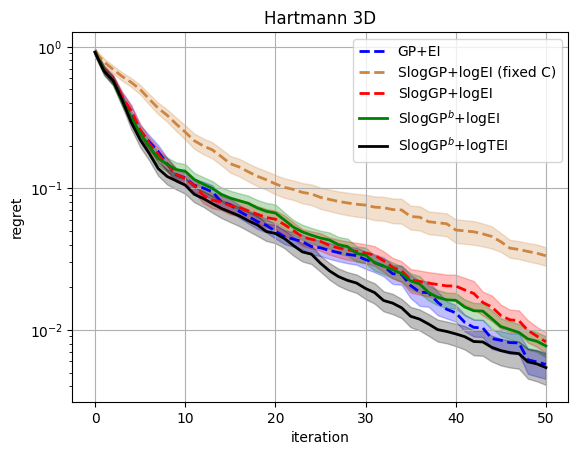

In [10]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =  -3.86278

log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Hartmann 3D')

plt.savefig('plots/Hartmann6.png')

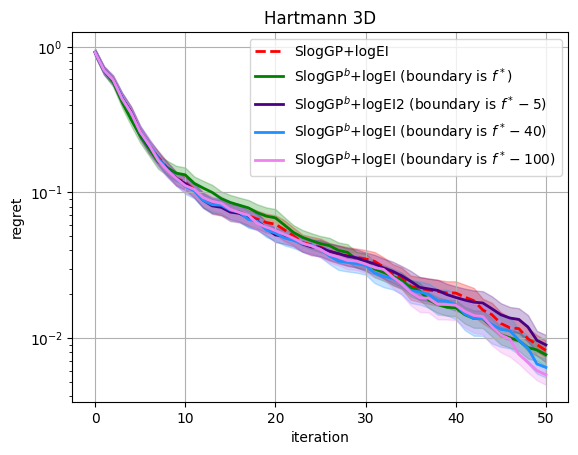

In [19]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logEI15 = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_5_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logEI40 = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_40_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logEI100 = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_100_SLogGP(boundary)+logEI'), delimiter=',')



fstar =  -3.86278

log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI (boundary is $f^*$)',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI15,fstar=fstar,label='SlogGP$^b$+logEI2 (boundary is $f^*-5$)',color='indigo',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI40,fstar=fstar,label='SlogGP$^b$+logEI (boundary is $f^*-40$)',color='dodgerblue',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI100,fstar=fstar,label='SlogGP$^b$+logEI (boundary is $f^*-100$)',color='violet',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.yscale("log") 
plt.legend()
plt.title('Hartmann 3D')

plt.savefig('plots/Hartmann_differentBoundary.png')

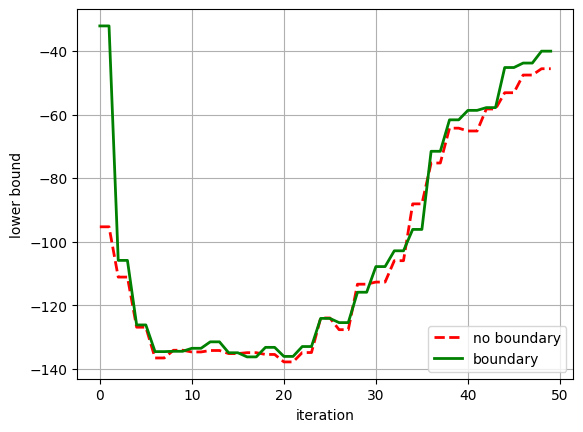

In [51]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')



median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()


plt.savefig('plots/Hartmann7.png')

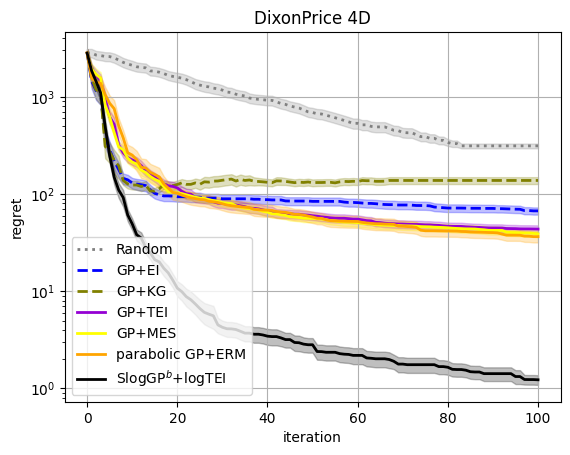

In [4]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_GP+TEI'), delimiter=',')
BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/DixonPrice4D_GP+KG'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(Random,fstar=fstar,label='Random',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-BO_KG,fstar=fstar,label='GP+KG',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='GP+MES',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('DixonPrice 4D')

plt.savefig('plots/DixonPrice5.png')

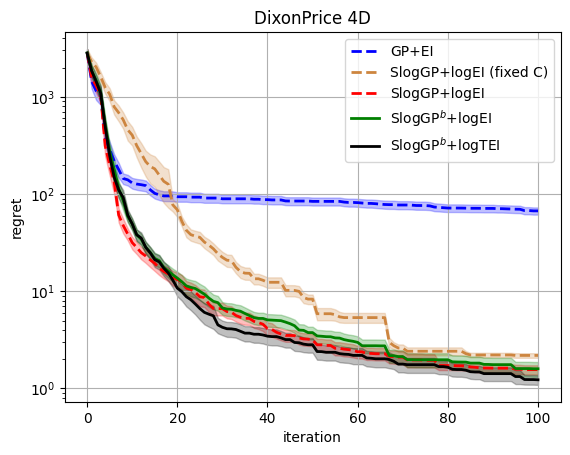

In [11]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =  0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('DixonPrice 4D')


plt.savefig('plots/DixonPrice6.png')

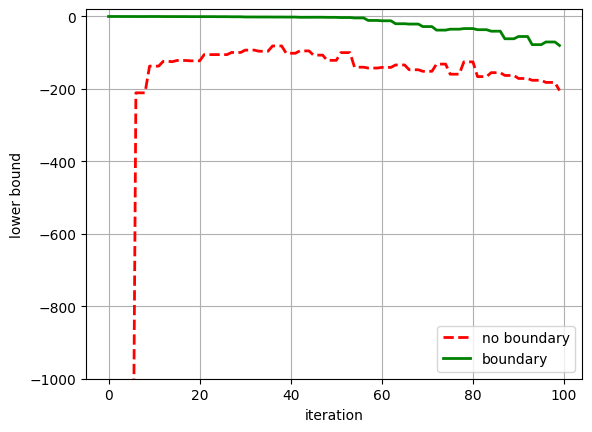

In [53]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')



median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()
plt.ylim([-1000,20])

plt.savefig('plots/DixonPrice7.png')


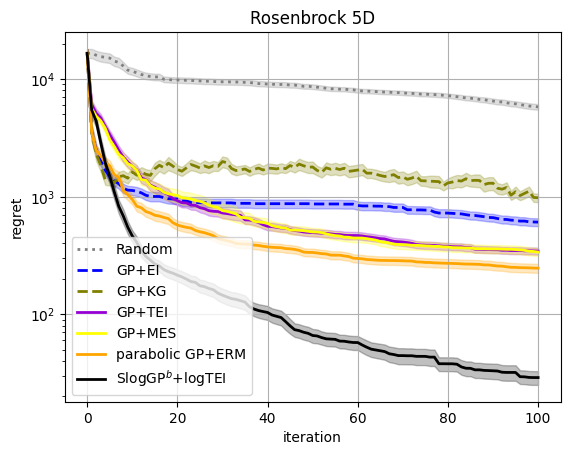

In [4]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_GP+EI'), delimiter=',')
BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/Rosenbrock5D_GP+KG'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.


log_RegretMean_plot(Random,fstar=fstar,label='Random',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-BO_KG,fstar=fstar,label='GP+KG',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='GP+MES',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.yscale("log") 
plt.legend()
plt.title('Rosenbrock 5D')

plt.savefig('plots/Rosenbrock5.png')

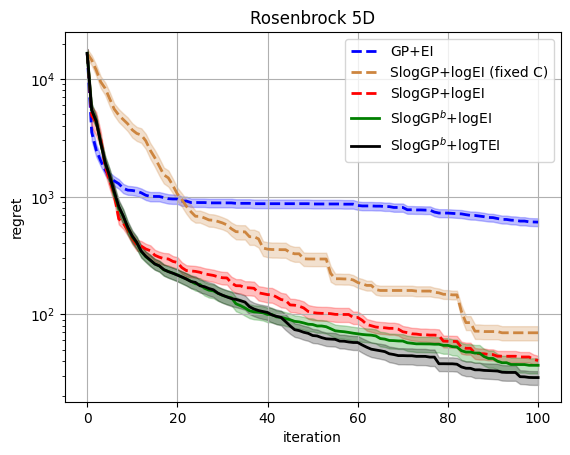

In [12]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.yscale("log") 
plt.legend()
plt.title('Rosenbrock 5D')


plt.savefig('plots/Rosenbrock6.png')


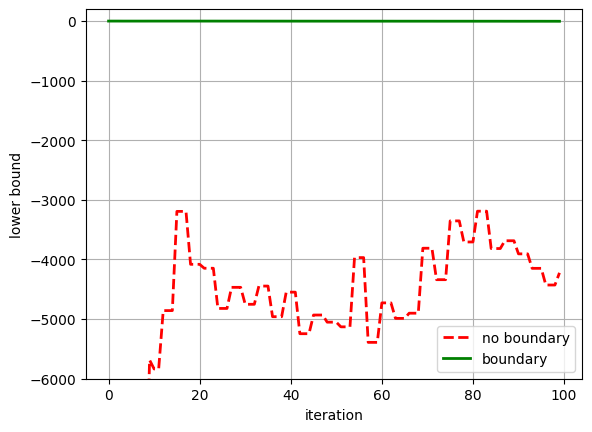

In [27]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')


median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()
plt.ylim([-6000,200])

plt.savefig('plots/Rosenbrock7.png')

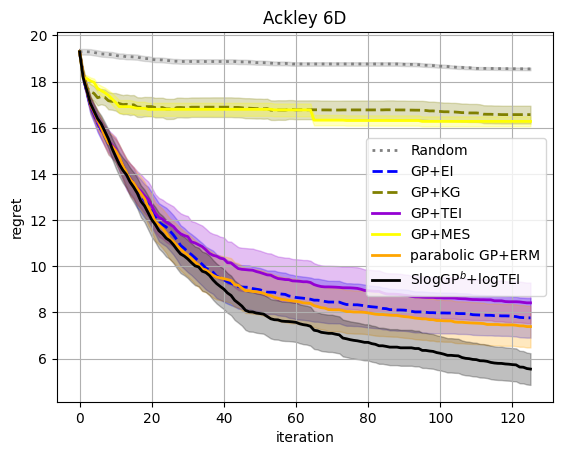

In [4]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_GP+EI'), delimiter=',')
BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/Ackley6D_GP+KG'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(Random,fstar=fstar,label='Random',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-BO_KG,fstar=fstar,label='GP+KG',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='GP+MES',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('Ackley 6D')


plt.savefig('plots/Ackley5.png')

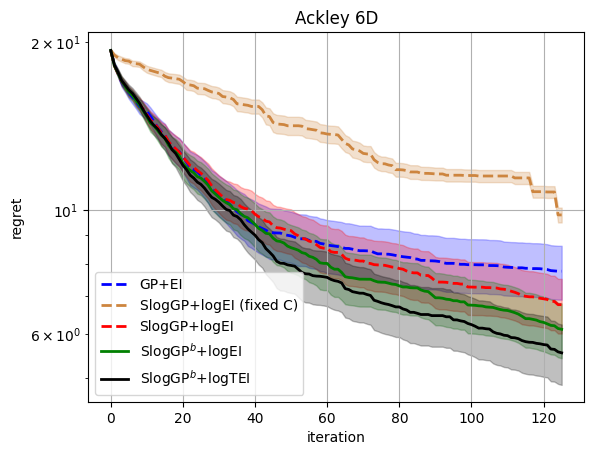

In [13]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.


log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.yscale("log") 
plt.legend()
plt.title('Ackley 6D')


plt.savefig('plots/Ackley6.png')

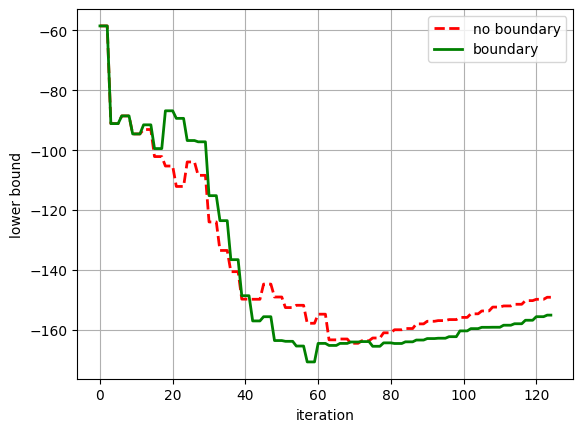

In [31]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')


median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

plt.savefig('plots/Ackley7.png')

(array([0.00991422, 0.01586275, 0.00396569, 0.00793137, 0.00793137,
        0.00793137, 0.00793137, 0.00396569, 0.        , 0.        ,
        0.00594853, 0.00594853, 0.01189706, 0.00198284, 0.00396569,
        0.        , 0.        , 0.        , 0.        , 0.00396569]),
 array([-204.82707485, -194.74054931, -184.65402376, -174.56749822,
        -164.48097268, -154.39444713, -144.30792159, -134.22139604,
        -124.1348705 , -114.04834495, -103.96181941,  -93.87529386,
         -83.78876832,  -73.70224277,  -63.61571723,  -53.52919168,
         -43.44266614,  -33.3561406 ,  -23.26961505,  -13.18308951,
          -3.09656396]),
 <BarContainer object of 20 artists>)

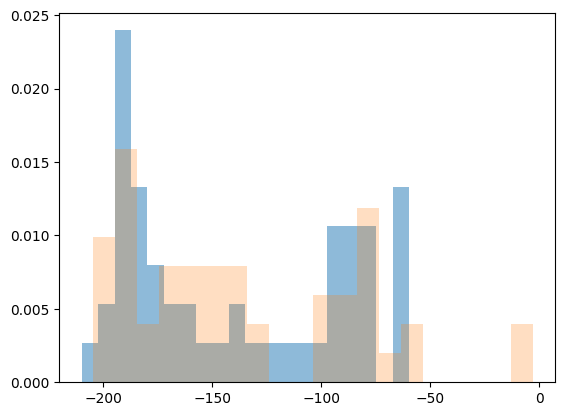

In [37]:
plt.hist(SLogGP_logEI[:,40],bins=20,alpha=0.5,density=True)
plt.hist(SLogGP_boundary_logEI[:,40],bins=20,alpha=0.25,density=True)

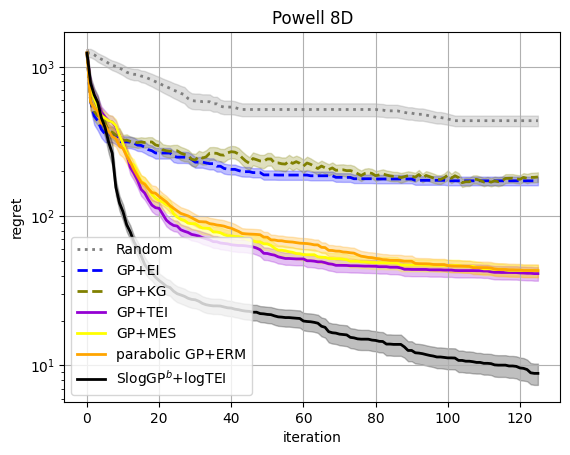

In [4]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_GP+EI'), delimiter=',')
BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/Powell8D_GP+KG'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(Random,fstar=fstar,label='Random',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-BO_KG,fstar=fstar,label='GP+KG',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='GP+MES',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')


plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Powell 8D')

plt.savefig('plots/Powell5.png')

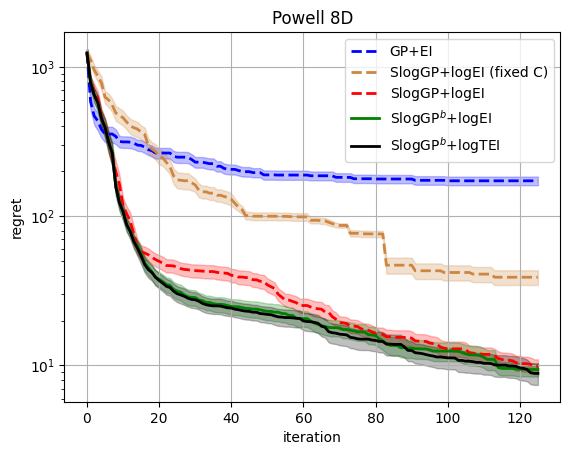

In [14]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =  0.


log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Powell 8D')

plt.savefig('plots/Powell6.png')

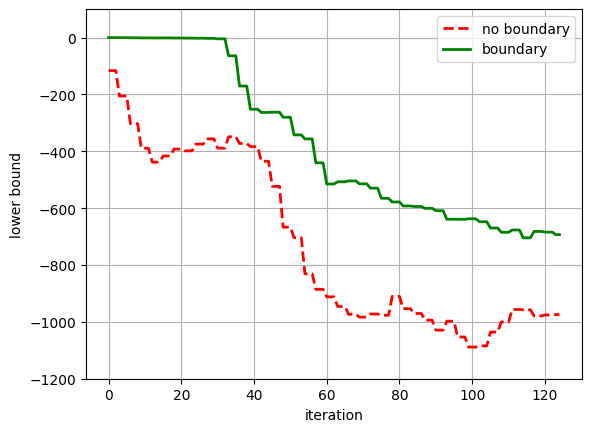

In [58]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')

median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

plt.ylim([-1200,100])

plt.savefig('plots/Powell7.png')

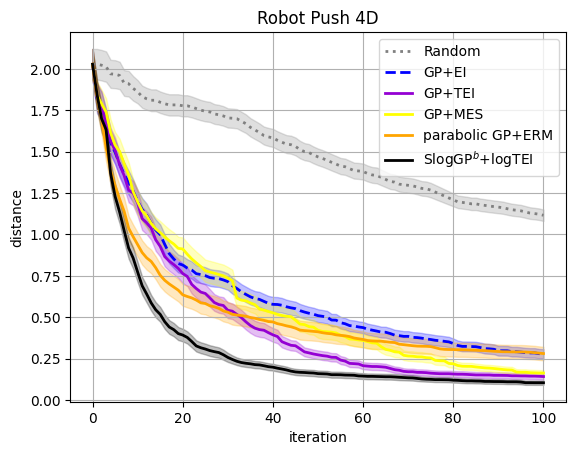

In [9]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(Random,fstar=fstar,label='Random',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
#log_RegretMean_plot(-BO_KG,fstar=fstar,label='GP+KG',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='GP+MES',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

plt.grid()
#plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('distance')
plt.legend()
plt.title('Robot Push 4D')


plt.savefig('plots/Push5.png')

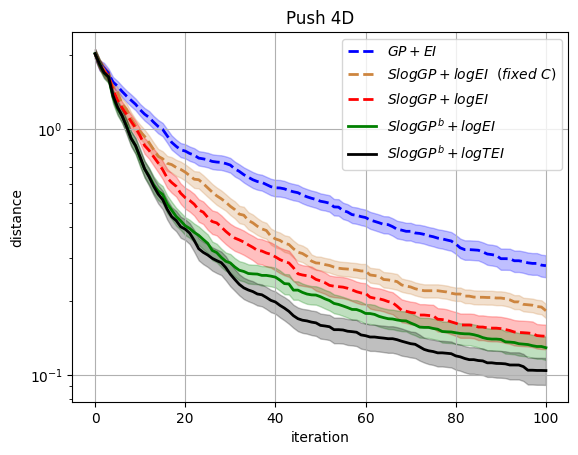

In [11]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res_first/Push4D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.grid()
plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('distance')
plt.legend()
plt.title('Push 4D')

plt.savefig('plots/Push6.png')

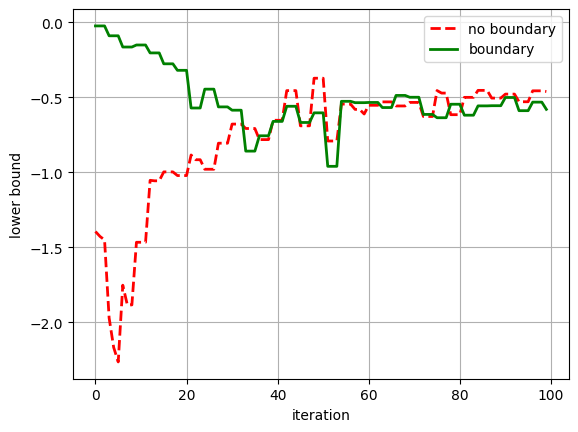

In [22]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')

median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

plt.savefig('plots/Push7.png')

(array([0.00387253, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00193626, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00193626, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00580879, 0.18007251]),
 array([-102.79086553,  -97.62627927,  -92.46169302,  -87.29710676,
         -82.1325205 ,  -76.96793424,  -71.80334799,  -66.63876173,
         -61.47417547,  -56.30958922,  -51.14500296,  -45.9804167 ,
         -40.81583044,  -35.65124419,  -30.48665793,  -25.32207167,
         -20.15748542,  -14.99289916,   -9.8283129 ,   -4.66372664,
           0.50085961]),
 <BarContainer object of 20 artists>)

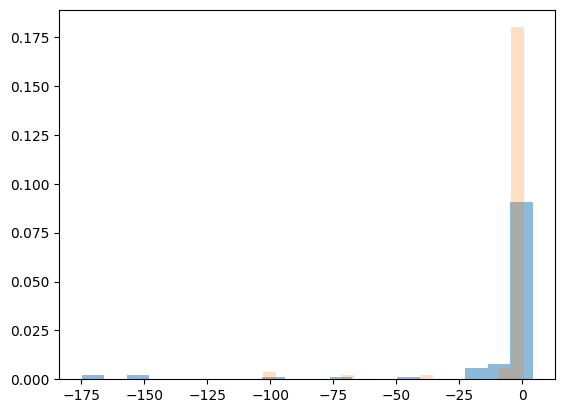

In [23]:
plt.hist(SLogGP_logEI[:,10],bins=20,alpha=0.5,density=True)
plt.hist(SLogGP_boundary_logEI[:,10],bins=20,alpha=0.25,density=True)

(array([0.00411583, 0.00137194, 0.00548777, 0.00137194, 0.01097555,
        0.00548777, 0.00274389, 0.00274389, 0.00274389, 0.        ,
        0.        , 0.00137194, 0.00274389, 0.        , 0.        ,
        0.00137194, 0.        , 0.        , 0.00137194, 0.09329216]),
 array([-145.39263372, -138.10370382, -130.81477392, -123.52584402,
        -116.23691412, -108.94798422, -101.65905432,  -94.37012442,
         -87.08119452,  -79.79226461,  -72.50333471,  -65.21440481,
         -57.92547491,  -50.63654501,  -43.34761511,  -36.05868521,
         -28.76975531,  -21.48082541,  -14.19189551,   -6.90296561,
           0.3859643 ]),
 <BarContainer object of 20 artists>)

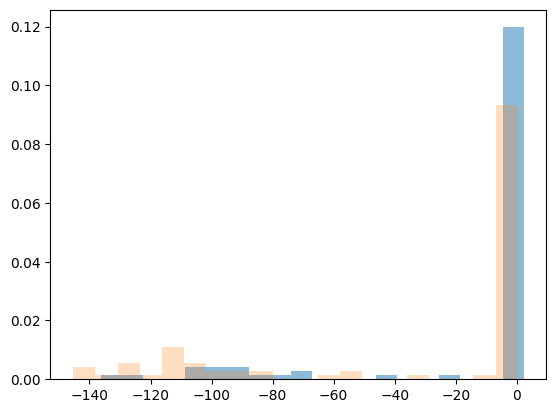

In [26]:
plt.hist(SLogGP_logEI[:,40],bins=20,alpha=0.5,density=True)
plt.hist(SLogGP_boundary_logEI[:,40],bins=20,alpha=0.25,density=True)

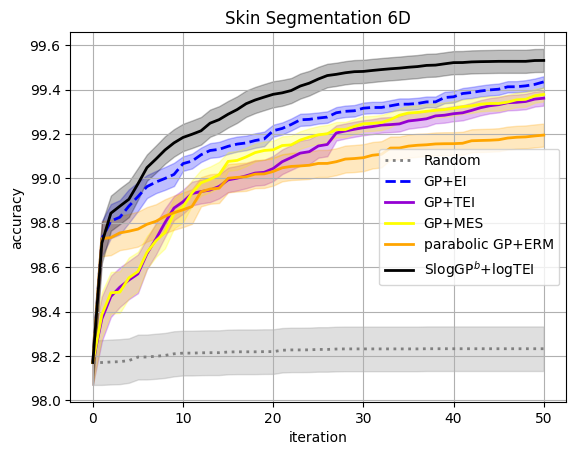

In [8]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.



log_RegretMean_plot(100-Random,fstar=fstar,label='Random',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(100-BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
#log_RegretMean_plot(-BO_KG,fstar=fstar,label='GP+KG',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(100-BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(100-BO_MES,fstar=fstar,label='GP+MES',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(100-BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='SlogGP+logEI (fixed C)',color='peru',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='SlogGP+logEI',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='SlogGP$^b$+logEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(100-SLogGP_boundary_logTEI,fstar=fstar,label='SlogGP$^b$+logTEI',color='black',linestyle='-',error_bound=True)

#plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.legend()
plt.grid()
plt.title('Skin Segmentation 6D')

plt.savefig('plots/Skin5.png')


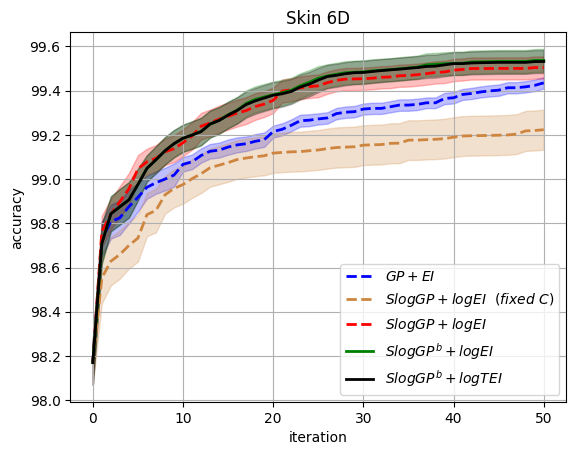

In [13]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.


log_RegretMean_plot(100-BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(100-SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(100-SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(100-SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(100-SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

#plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.legend()
plt.grid()
plt.title('Skin 6D')

plt.savefig('plots/skin6.png')


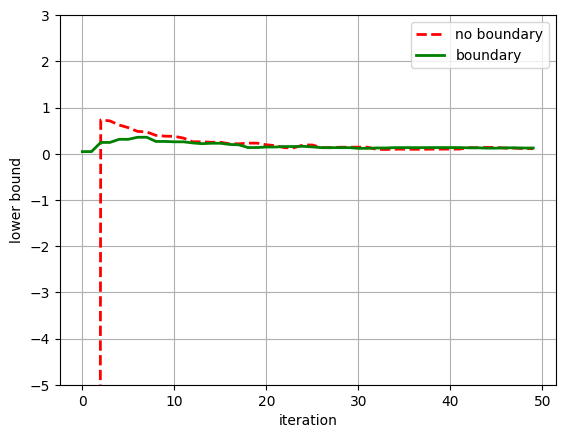

In [9]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')

plt.xlabel('iteration')
plt.ylabel('lower bound')
plt.ylim([-5,3])
plt.grid()
plt.legend()

plt.savefig('plots/Skin7.png')

Text(0.5, 1.0, 'bank 6D')

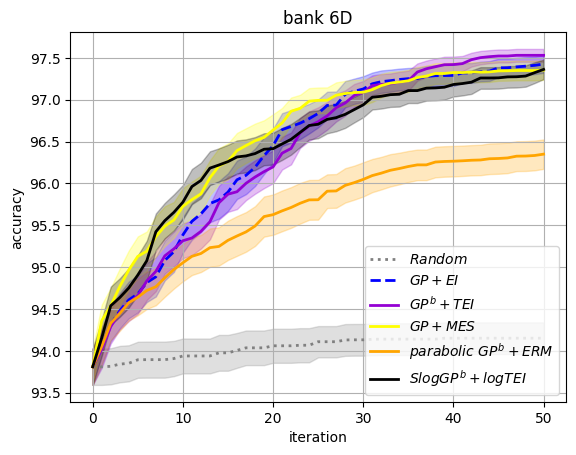

In [7]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.


log_RegretMean_plot(100-Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(100-BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(100-BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(100-BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(100-BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(100-SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(100-SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(100-SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

#plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.legend()
plt.grid()

plt.title('bank 6D')


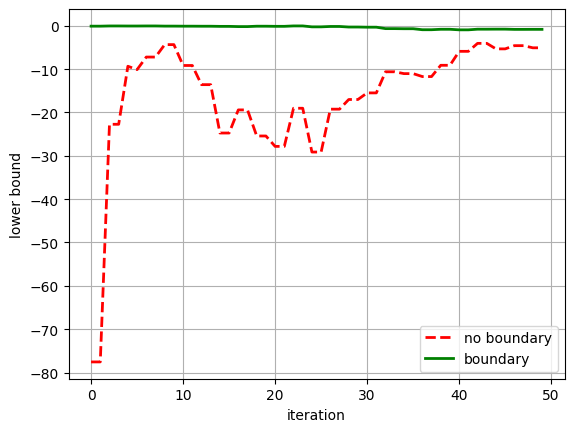

In [3]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')

plt.xlabel('iteration')
plt.ylabel('lower bound')
# plt.ylim([-5,3])
plt.grid()
plt.legend()